# Predicting Song Genre from Song Lyrics

### Predicting using Naive Bayes (Part 2)

The data is an accumulation of 380,000+ lyrics from the website MetroLyrics.com. We have multiple artists in 10 varying genres ranging from Pop & Rock to Indie & Folk. The songs range from years 1960 to 2016. 

The goal of the project was, as said in title, to predict genre based on the lyrics. In order to tackle this problem, this involved doing natural language processing in order to effectively analyze the lyrics. 

In [2]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

In [3]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Manda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Manda\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Manda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## This is the cleaned lyrics data from Part 1

In [4]:
df2 = pd.read_csv('lyrics_final.csv', delimiter=',')

### Split Data for Train & Test

In [5]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df2['lyrics_final'],df2['genre'],test_size=0.3)

# What is TFIDF Vectorizer - Measuring Originality

### TFIDF - term-frequency x inverse document-frequency

TFIDF takes an occurence of a token (i.e. a lemmatized word) in the data and scales down the impact of these tokens that occur very frequently in our data. In our example, this means a lemmatized word would be "less informative" if it occured more frequently across all genres. A key example of this would be the word "love".

The tf-idf is a statistic that increases with the number of times a word appears in the document (lyrics of a song), penalized by the number of genres in the data that contain that word.

However, if a lemmatized word appeared more frequently in a particular genre it would be more valuable/original, and we would  capture that originality which will help us predict the genre of that that group of words. 


------------------

max_df - ignoring terms that have a document frequency higher than 0.7  
.fit() - fits the vocabulary and term frequencies of word-vector   
.transform() - using "fit()" calculation parameters, apply the transformation to a dataset.  
  

In [6]:
Tfidf_vect = TfidfVectorizer(sublinear_tf=True, max_features=10000, max_df=0.7) #igoring
Tfidf_vect.fit(df2['lyrics_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

### What is a TFIDF Vector?

First Column: Document index (song lyrics) 

Second Column: Specific word-vector index (lemmatized word in lyrics)  

Third Column: TFIDF score ("originality score") for word in lyrics

----------------

Here is an example of what a tfidf sparse matrix looks like:

In [7]:
#vocab dictionary - a mapping of terms to feature indices.
#print(Tfidf_vect.vocabulary_)

### TFIDF Output

We see here a more tangible look at the tfidf sparse matrix using .get_feature_names(). get_features_names() shows, in alphabetical order, the words of the word-vectors that would be in column 2.

The print statement is what "Tfidf_vect.fit(df2['lyrics_final'].head(2)).get_feature_names()" output looks like but in a more visually friendly way

In [8]:
#these are examples of what the second column of tfidf_vect represents
#Tfidf_vect.fit(df2['lyrics_final'].head(2)).get_feature_names()

In [9]:
print(['accelerate', 'across', 'allow', 'another', 'as', 'away', 'awful', 'back', 'balch', 'blinding', 'bob', 'breakin', 'certain', 'check', 'clear', 'coca', 'cola', 'cold', 'control', 'cover', 'day', 'different', 'dull', 'ever', 'fact', 'fake', 'fault', 'feel', 'field', 'find', 'first', 'fish', 'floor', 'foot', 'four', 'friend', 'gain', 'gasoline', 'give', 'glass', 'go', 'habit', 'hidden', 'impossible', 'known', 'light', 'line', 'little', 'lot', 'mad', 'mean', 'miserable', 'mola', 'motionless', 'never', 'notice', 'observe', 'party', 'pass', 'people', 'pick', 'pretty', 'read', 'revive', 'road', 'rock', 'route', 'say', 'see', 'seem', 'shaky', 'sign', 'sin', 'since', 'start', 'sunday', 'sure', 'talk', 'tell', 'think', 'time', 'urethane', 'watch', 'water', 'way', 'would', 'year'])

['accelerate', 'across', 'allow', 'another', 'as', 'away', 'awful', 'back', 'balch', 'blinding', 'bob', 'breakin', 'certain', 'check', 'clear', 'coca', 'cola', 'cold', 'control', 'cover', 'day', 'different', 'dull', 'ever', 'fact', 'fake', 'fault', 'feel', 'field', 'find', 'first', 'fish', 'floor', 'foot', 'four', 'friend', 'gain', 'gasoline', 'give', 'glass', 'go', 'habit', 'hidden', 'impossible', 'known', 'light', 'line', 'little', 'lot', 'mad', 'mean', 'miserable', 'mola', 'motionless', 'never', 'notice', 'observe', 'party', 'pass', 'people', 'pick', 'pretty', 'read', 'revive', 'road', 'rock', 'route', 'say', 'see', 'seem', 'shaky', 'sign', 'sin', 'since', 'start', 'sunday', 'sure', 'talk', 'tell', 'think', 'time', 'urethane', 'watch', 'water', 'way', 'would', 'year']


# Naive Bayes - Multinomial

With tfidf, the term frequencies are used to compute the maximum-likelihood estimate based on the training data to estimate the class-conditional probabilities in the multinomial model. 

In [10]:
#TFIDF
Naive = naive_bayes.MultinomialNB(alpha = .01)
Naive.fit(Train_X_Tfidf,Train_Y)
predictions_NB = Naive.predict(Test_X_Tfidf)
print("Naive Bayes Accuracy Score TFIDF:",accuracy_score(predictions_NB, Test_Y)*100)


Naive Bayes Accuracy Score TFIDF: 57.619656298821184


## Confusion Matrix of True vs Predicted from Naive Bayes


Yikes! Rock is overtaking all predictions. Let's look into how we can improve upon that

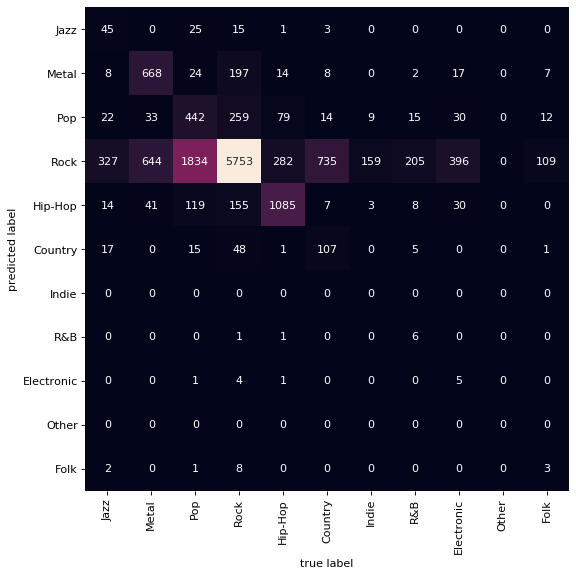

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

genres = ['Jazz','Metal', 'Pop',  'Rock', 'Hip-Hop', 'Country', 'Indie','R&B', 'Electronic', 'Other', 'Folk']
mat = confusion_matrix(Test_Y, predictions_NB, genres)
sns.heatmap(
    mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=genres, 
    yticklabels=genres
)
plt.xlabel('true label')
plt.ylabel('predicted label');


### Country Songs that were Predicted Rock


Let's take a look at Country songs that were predicted Rock. There should be a decent difference between Country and Rock songs, right? Well, let's figure it out and see how we can improve predictions. 

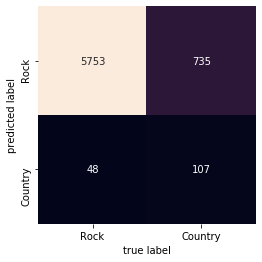

In [12]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

genres = ['Rock', 'Country']
mat = confusion_matrix(Test_Y, predictions_NB, genres)
sns.heatmap(
    mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=genres, 
    yticklabels=genres
)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Create Dataframe comparing Misclassifications & Predictions 

Here we create a dataframe, take the true genres, Naive Bayes predictions of genres, and lyrics to try to get a better view of what could have gone wrong (or, how we can improve predictions)

In [39]:
test_predict_genre = {'testx': Test_X, 'testy': Test_Y, 'predict': predictions_NB}
dfnew = pd.DataFrame(test_predict_genre)
dfnew

,testx,testy,predict
3445,"['tonight', 'gon', 'love', 'tonight', 'gon', '...",Pop,Rock
17890,"['thomas', 'eriksson', 'l', 'peter', 'johansso...",Metal,Metal
30277,"['tell', 'anyone', 'way', 'hold', 'hand', 'tel...",Pop,Rock
8912,"['transcendental', 'meditation', 'emancipate',...",Rock,Rock
45958,"['preguntan', 'pinos', 'pudo', 'fugar', 'carga...",Indie,Pop
...,...,...,...
17607,"['joe', 'lion', 'go', 'bar', 'couple', 'drink'...",Rock,Rock
30065,"['young', 'think', 'think', 'think', 'do', 'th...",Indie,Rock
23347,"['boundary', 'far', 'go', 'catch', 'clutch', '...",Metal,Metal
23220,"['meet', 'sweep', 'foot', 'boyish', 'smile', '...",R&B,Rock


### Now let's narrow down the data even further for Country vs Rock

Now we'll take songs that were actually Country (testy column) and compare them to ones that were predicted as Rock (predict column) so we can individually look at examples of lyrics that were misclassified.

Here we will see two different dataframes. "dfcountryrock" are songs that were predicted as Rock although they were actually Country. "dfrockrock" are songs that were predicted as Rock when their actual value was Rock as well.

In [49]:
#taking all Test_Y that were country but classified as Rock
dfmisscountry = dfnew['testy'] == 'Country'
dftest = dfnew[dfmisscountry] 

#Now take values of predictions that = Rock
dftestpredictrock = dftest['predict'] == 'Rock'
dfcountryrock = dftest[dftestpredictrock]
dfcountryrock

,testx,testy,predict
25818,"['well', 'baby', 'know', 'love', 'sure', 'easy...",Country,Rock
19124,"['write', 'billy', 'burnette', 'ava', 'aldridg...",Country,Rock
15200,"['give', 'anything', 'today', 'help', 'needed'...",Country,Rock
5652,"['monday', 'friday', 'night', 'highway', 'long...",Country,Rock
28422,"['well', 'meet', 'pretty', 'little', 'girl', '...",Country,Rock
...,...,...,...
1291,"['leave', 'set', 'cry', 'time', 'aside', 'know...",Country,Rock
28874,"['love', 'river', 'drowning', 'would', 'get', ...",Country,Rock
43306,"['sunny', 'yesterday', 'life', 'fill', 'rain',...",Country,Rock
14630,"['smile', 'somebody', 'love', 'smile', 'take',...",Country,Rock


In [50]:
#taking all Test_Y that were Rock 
dfrock = dfnew['testy'] == 'Rock'
dftest = dfnew[dfrock] 

#Now take values of predictions that = Rock
dftestpredictrock2 = dftest['predict'] == 'Rock'
dfrockrock = dftest[dftestpredictrock2]
dfrockrock

,testx,testy,predict
8912,"['transcendental', 'meditation', 'emancipate',...",Rock,Rock
9492,"['sunday', 'best', 'blanket', 'silence', 'perf...",Rock,Rock
4955,"['bring', 'flower', 'bed', 'wish', 'know', 'ti...",Rock,Rock
40836,"['life', 'little', 'sunlight', 'want', 'shine'...",Rock,Rock
40680,"['three', 'mile', 'river']",Rock,Rock
...,...,...,...
35455,"['come', 'time', 'u', 'must', 'leave', 'nothin...",Rock,Rock
12679,"['another', 'friday', 'night', 'get', 'feeling...",Rock,Rock
9488,"['wind', 'ruthless', 'tree', 'shake', 'angry',...",Rock,Rock
41199,"['warm', 'sun', 'feed', 'leery', 'load', 'loat...",Rock,Rock


###  Let's Dive into Songs

I actually looked at individual examples of songs because I wanted to see what the computer sees. Some songs I couldn't even distinguish whether or not they were country. Some songs, however, were very obviously Country once I dove into the data. So, how will be fix these incorrect predictions? 

In [56]:
#Example of song that was predicted as Rock even though it was Country
dfcountryrock.loc[15200]

testx      ['give', 'anything', 'today', 'help', 'needed'...
testy                                                Country
predict                                                 Rock
Name: 15200, dtype: object

In [59]:
#Let's go look at original data to get the full lyrics of that particular example
df2.loc[15200]['lyrics_final']

"['give', 'anything', 'today', 'help', 'needed', 'soul', 'way', 'dawn', 'set', 'sun', 'wound', 'anyone', 'shall', 'weep', 'do', 'today', 'today', 'day', 'day', 'fail', 'great', 'flame', 'way', 'know', 'do', 'best', 'go', 'take', 'rest', 'let', 'name', 'bless', 'today', 'make', 'person', 'glad', 'today', 'help', 'someone', 'mortal', 'day', 'cancel', 'sad', 'try', 'make', 'poor', 'heart', 'glad', 'answer', 'wisdom', 'today', 'today', 'day']"

### Words in Country vs Rock Songs

I wanted to see if there were particular words in Country songs that were not normally in Rock songs. Even though not an avid listener to Country music I knew that Country songs used unique nouns. To test my theory, I created a dictionary of words that I believed should be in Country songs more often than Rock songs. 

In [133]:
country_dict = ['broncos', 'amarillo', 'rodeo', 'truck', 'trucks', 'cabin', 'honky', 'tonk', 'dog', 'horse', 'country', 
                'roadhouse', 'cotton', 'corn', 'acres', 'swingin', 'creek', 'prarie', 
                'honey', 'county', 'fence', 'boots', 'cowboy', 'beer', 'texas', 'oklahoma', 'backroad', 'tea', 'church', 'god',
               'drunk', 'lord', 'gravel']

### Comparing Certain Words in Country vs Rock

I used CountVectorizer() so that I could obtain an actual count of certain words that were used in Country songs vs Rock songs. Here we loop through the lyrics to get a count of words in the misclassification dataframes. 

Based on words I chose for "country_dict", we are able to see that certain words do show up more in Country songs and Rock Songs. The eventual goal, which I ended up not implementing, was to add weight to certain words in TFIDF function that were more important for particular genres. By adding weight to these words, the goal would be to have more accurate predictions (at least for Country vs Rock). 

In [134]:
import pandas as pd
import numpy as np    
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()   
cv_fitrock =cv.fit_transform(dfrockrock['testx']) 
cv_fitcountry =cv.fit_transform(dfcountryrock['testx'])    

word_list = cv.get_feature_names();    
count_listrock = cv_fitrock.toarray().sum(axis=0)  
count_listcountry = cv_fitcountry.toarray().sum(axis=0)  

In [135]:
y = dict(zip(word_list,count_listcountry))
for key in y:
    if key in country_dict:
        print(key, y[key])

amarillo 1
beer 23
cabin 2
church 26
corn 6
cotton 11
country 73
county 38
cowboy 21
creek 10
dog 42
drunk 5
fence 6
god 125
gravel 1
honey 50
honky 20
horse 16
lord 109
oklahoma 7
rodeo 14
swingin 2
tea 2
texas 24
tonk 7
truck 22


In [137]:
y = dict(zip(word_list,count_listrock))
for key in y:
    if key in country_dict:
        print(key, y[key])

amarillo 1
beer 1
cabin 1
church 1
corn 1
cotton 2
country 2
county 3
cowboy 4
creek 1
dog 1
drunk 1
fence 1
god 2
gravel 1
honey 1
honky 1
horse 12
lord 1
oklahoma 18
rodeo 4
swingin 15
tea 1
texas 5
tonk 345
truck 180


# In Conclusion
### Getting There!

Yay! We do see some success with certain words occuring more in Country songs vs Rock Songs! Some words that occured in Rock songs were pretty surprising (such as the high occurence of "tonk" and "truck"). But, we do see light at the end of the tunnel. Were I to explore this path further of adding more weight to certain words, I would gather a larger dictionary of words and add the appropriate weights for TFIDF to make better predictions. 

Other ideas would be to do an unsupervised learning method, do SVM (support vector machine) as a prediction method as well. 